# Applied Plotting, Charting & Data Representation in Python

## Project

## Research Question 

Analyse the relation between GDP per capita and CO2 emmisions over the years

This analysis would form the base of understanding as to how much do the developed and developing countries contribute to CO2 emmision.

For the analysis, 2 data sets have been used 
        1) [CO2 emmisions per country](https://ourworldindata.org/grapher/annual-co2-emissions-per-country)
        2) [GDP per capita per country](https://ourworldindata.org/grapher/gdp-per-capita-worldbank)
        
For the purpose of this analysis we will be taking only the top 5 and bottom 5 GDP growth, and plot it against the CO2 emmision.
        

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### CO2 emmision data 

In [3]:
co2_df = pd.read_csv('annual-co2-emissions-per-country.csv')
co2_df.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


### GDP per capita data

In [4]:
gdp_df = pd.read_csv('gdp-per-capita-worldbank.csv')
gdp_df.head()
gdp_df = gdp_df.drop('Code',axis = 1)

### Data cleaning

In [23]:
gdp_df = gdp_df.rename(columns = {
            "GDP per capita (int.-$) (constant 2011 international $)":"GDPc",
            "Entity" : "Country" 
        })

#gdp_df = gdp_df.set_index(['Country'])
gdp_df.reset_index()


Country
Afghanistan    2002
Afghanistan    2003
Afghanistan    2004
Afghanistan    2005
Afghanistan    2006
Afghanistan    2007
Afghanistan    2008
Afghanistan    2009
Afghanistan    2010
Afghanistan    2011
Afghanistan    2012
Afghanistan    2013
Afghanistan    2014
Afghanistan    2015
Afghanistan    2016
Afghanistan    2017
Name: Year, dtype: int64


Afghanistan


TypeError: unhashable type: 'numpy.ndarray'

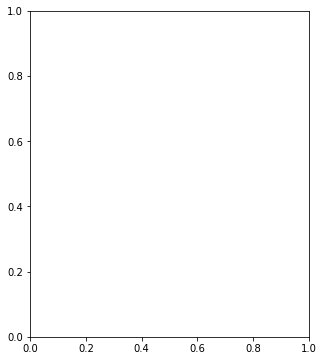

In [18]:
plt.figure(figsize=(5,6))
plt.subplot(111)
#for ind in range(5):
years = gdp_df.groupby('Country')['Year']
gdp = gdp_df.groupby('Country')['GDPc']
label = gdp_df.index[0]
print(label)
print(gdp)
print(years)


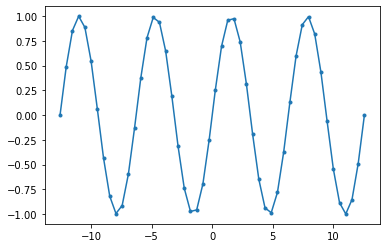

In [8]:
x = np.linspace(-4*np.pi,4*np.pi)
y = np.sin(x)
plt.plot(x,y,'.-')
plt.show()